In [1]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-generation", model="ContextualAI/archangel_sft_pythia1-4b")

/scratch/yl13579/.conda/envs/trl/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cuda:0


In [2]:
title = "The Best Machine Learning Course"
input_text = f'List 5 words that could be used in a story titled "{title}".\nDo not write anything else but a list of 5 words without numbers.'

print(input_text)

List 5 words that could be used in a story titled "The Best Machine Learning Course".
Do not write anything else but a list of 5 words without numbers.


In [3]:
pipe(input_text)

[{'generated_text': 'List 5 words that could be used in a story titled "The Best Machine Learning Course".\nDo not write anything else but a list of 5 words without numbers.\n\nA:\n\nI would say:\n\nThe best machine learning course\n\nThe'}]

In [4]:
input_text_simple = "Once upon a time"
pipe(input_text_simple,max_new_tokens=128, do_sample=True)

[{'generated_text': 'Once upon a time, I saw one of my first stories published in the local paper. After receiving the magazine, I was surprised by how pleased I was to be published. As the story was finally ready to go to print, my publisher requested a copy. She told me I had beautiful handwriting, and this is my only story ever printed. Over the years, I wrote many more stories, but I could not produce even a few manuscripts a year (though I did sometimes sell a story as it was finished). Because I had such a poor record, I did not publish any of my poems or prose works. Instead, I produced small anthologies that I'}]

In [5]:
#base model
pipe_base = pipeline("text-generation", model="EleutherAI/pythia-1.4b")


Device set to use cuda:0


In [6]:
pipe_base(input_text_simple,max_new_tokens=128, do_sample=True)

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


[{'generated_text': "Once upon a time...\n\n1 in 10 women will experience sexual assault while in college (Bauer, 1999, p. 1770)1\n\nAccording to the National Coalition Against Sexual Assault, women are up to 2,700 times more likely to experience sexual assault in college than they are in the rest of life (McGraw et al., 2003, p. 36).2\n\nIf you're a woman college student, you can still count on having the opportunity to have the kind of experiences that may seem terrifying to men because of how often women have been groped and sexually assaulted. But beware: when we know that"}]

## Logit analysis

In [3]:
import numpy as np
import scipy.stats

In [7]:
from transformers import AutoModelForCausalLM, AutoTokenizer

sft_model = AutoModelForCausalLM.from_pretrained("ContextualAI/archangel_sft_pythia2-8b")
base_model = AutoModelForCausalLM.from_pretrained("EleutherAI/pythia-2.8b")
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-2.8b")

sft_model.cuda()
base_model.cuda()

Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.05s/it]


GPTNeoXForCausalLM(
  (gpt_neox): GPTNeoXModel(
    (embed_in): Embedding(50304, 2560)
    (emb_dropout): Dropout(p=0.0, inplace=False)
    (layers): ModuleList(
      (0-31): 32 x GPTNeoXLayer(
        (input_layernorm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (post_attention_layernorm): LayerNorm((2560,), eps=1e-05, elementwise_affine=True)
        (post_attention_dropout): Dropout(p=0.0, inplace=False)
        (post_mlp_dropout): Dropout(p=0.0, inplace=False)
        (attention): GPTNeoXAttention(
          (query_key_value): Linear(in_features=2560, out_features=7680, bias=True)
          (dense): Linear(in_features=2560, out_features=2560, bias=True)
        )
        (mlp): GPTNeoXMLP(
          (dense_h_to_4h): Linear(in_features=2560, out_features=10240, bias=True)
          (dense_4h_to_h): Linear(in_features=10240, out_features=2560, bias=True)
          (act): GELUActivation()
        )
      )
    )
    (final_layer_norm): LayerNorm((2560,), eps=1e-05

In [8]:
base_prompt = "So many times have I walked on ruins"
base_input_ids = tokenizer(base_prompt, return_tensors="pt").input_ids.cuda()

sft_prompt = "So many times have I walked on ruins"
sft_input_ids = tokenizer(sft_prompt, return_tensors="pt").input_ids.cuda()

sft_model_output = sft_model.generate(sft_input_ids, max_new_tokens=128, do_sample=True, return_dict_in_generate=True, output_scores=True)
base_model_output = base_model.generate(base_input_ids, max_new_tokens=128, do_sample=True, return_dict_in_generate=True, output_scores=True)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


In [9]:
sft_model_output

GenerateDecoderOnlyOutput(sequences=tensor([[ 2598,  1142,  2069,   452,   309,  7428,   327, 28478,    15,  2053,
         17380,   273,  7477,   449,   187,   187,  1328,   574,  1119,   247,
          2238,   285, 11453,   952,   665,   574,  4307,   342,   616,  1211,
          3564,   285,   574,   417, 32945,   327, 20949,    13,   533,   326,
           651,   417,  1390,  1048,    15,  2635,   597,   651,   320,  3531,
           715, 10089, 34696,    13,   285,   840,   597,   651,   320,   275,
          5434,   273, 21891,    15,   187,   187,   510,  1711,   952,   665,
          4307,   327,   253,  7477,   574,   644,   387,   253,  2628,   323,
         13719,  1107,    13,   533,   627,   497,   760,  3578,   273,   731,
          1335,  2444,   275,   253,  7477,    13,   285,   597,   497,   512,
          1711,    15,  1583,   497,   751,   253, 38490,   275,   253, 27826,
         16511,   273,   388,  3355,    15,   380, 23957,   275,   253, 16511,
           369, 

In [29]:
print(tokenizer.batch_decode(sft_model_output.sequences))
print(tokenizer.batch_decode(base_model_output.sequences))

['So many times have I walked on ruins and in despair.\n\nAnd I have been a coward in fear of darkness.\n\n"In order to defeat you," God said, "we will need to be like you."\n\nI\'ve heard it said that you can only know darkness and fear.\n\nAnd I have learned that all the darkness I\'ve seen has been real, as real and terrible as anyone\'s darkness.\n\nI\'ve seen children torn from their mothers in the war years. I\'ve seen men driven to madness and death on the battlefield—a thousand years of war. I\'ve seen whole swaths of land burned and obliterated.\n']
['So many times have I walked on ruins. For the sake of you."\n\nSharadza stood up. "Where are all these ruins?" She looked through the crowd until she saw a man who looked familiar. He looked slightly older than her, though he was younger than the men she normally hunted. It struck her that he had some of the same height as her in years, only now it seemed she had not grown at all since she left the palace.\n\n"Where are they, Lor

In [30]:
def top_k(logits, k=30, sort_output=True):
    partition_index = len(logits) - k
    candidate_indices = np.argpartition(logits, partition_index)[partition_index:]

    if sort_output:
        sorted_indices = candidate_indices[np.argsort(logits[candidate_indices])[::-1]]
        return logits[sorted_indices], sorted_indices
    else:
        return logits[candidate_indices], candidate_indices

In [39]:
index = 0
TOP_K=50
sft_logits = sft_model_output.scores[index].squeeze(0).cpu().detach()
base_logits = base_model_output.scores[index].squeeze(0).cpu().detach()

# top-k decoding
sft_logits, sft_indices = top_k(sft_logits.numpy(), k=TOP_K)
base_logits, base_indices = top_k(base_logits.numpy(), k=TOP_K)

sft_probs = np.exp(sft_logits) / np.sum(np.exp(sft_logits))
base_probs = np.exp(base_logits) / np.sum(np.exp(base_logits))

# Compute entropy
sft_entropy = scipy.stats.entropy(sft_probs)
base_entropy = scipy.stats.entropy(base_probs)

print(f"SFT model entropy: {sft_entropy:.4f}")
print(f"Base model entropy: {base_entropy:.4f}")

SFT model entropy: 2.5633
Base model entropy: 2.6283


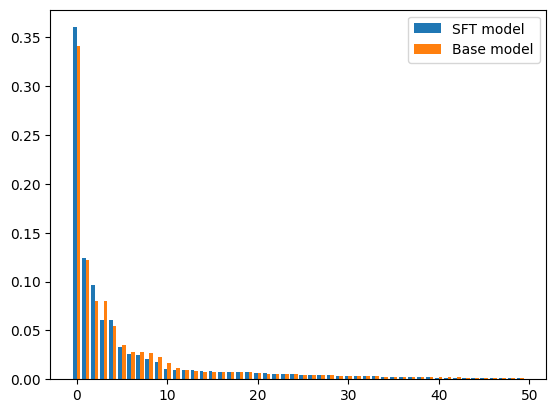

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# plot the two distribution side by side
width = 0.4

plt.bar(np.arange(len(sft_probs)) - width/2, sft_probs, width, label='SFT model')
plt.bar(np.arange(len(base_probs)) + width/2, base_probs, width, label='Base model')

plt.legend()
# plt.xlim(-500, 10000)
plt.show()